# ICO projects from coinmarketcap 

An initial coin offering (ICO) is an event where a company sells a new cryptocurrency to raise money. Investors receive cryptocurrency in exchange for their financial contributions. In many ways, an ICO is the cryptocurrency version of an initial public offering (IPO) in the stock market.

There are milions of ICOs was created, only some project have enough credibility could show them off on coinmarketcap. Let's see how were their perfomances?

Data from coinmarketcap: https://coinmarketcap.com/ico-calendar/ended/

Price data from coinmarketcap api, too

Cleaning process could be check at 

In [2]:
## Import packages here
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import lime.lime_tabular

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz, plot_tree
from sklearn.inspection import permutation_importance #, plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay

Cleaned data  look like this:

In [12]:
df = pd.read_csv('./pj_data/cleaned_data.csv')
df = df.iloc[: , 1:]
df.head()

,icoPriceUsd,currentStage,goalUsd,total_supply,is_active,price,exchangeName,n_contracts,isbnb,tags_reduce,iseth,issol,ismatic,isada,isavax,lifeday
0,0.08,1,98000.0,1.000000e+08,1,0.005751,10,1.0,1,6,0,0,0,0,0,656
1,0.03,1,80000.0,1.000000e+17,0,0.000000,10,2.0,0,10,1,1,0,0,0,311
2,0.60,1,1500000.0,1.000000e+08,1,0.055907,10,1.0,0,10,0,0,0,0,0,138
3,0.00,0,300000000.0,1.000000e+17,1,0.011018,3,1.0,0,10,0,0,0,0,0,4
4,0.95,1,500000.0,1.000000e+17,0,0.000000,3,1.0,0,10,1,0,0,0,0,70


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
icoPriceUsd,1220.0,5.891680e+00,1.861119e+02,0.0,1.000000e-02,4.000000e-02,1.500000e-01,6.500000e+03
currentStage,1220.0,1.348361e+00,1.145289e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00
goalUsd,1220.0,5.311083e+07,1.133864e+08,0.0,1.000000e+05,2.000000e+05,2.055000e+06,3.000000e+08
total_supply,1220.0,2.233385e+16,4.163714e+16,100000.0,1.200000e+08,1.000000e+09,6.428501e+10,1.000000e+17
is_active,1220.0,6.688525e-01,4.708190e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
price,1220.0,7.188388e+00,1.961358e+02,0.0,1.267517e-04,1.839954e-03,1.582388e-02,6.615486e+03
exchangeName,1220.0,8.909016e+00,2.816933e+00,0.0,1.000000e+01,1.000000e+01,1.000000e+01,1.300000e+01
n_contracts,1220.0,1.524590e+00,1.010309e+00,1.0,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01
isbnb,1220.0,6.319672e-01,4.824681e-01,0.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
tags_reduce,1220.0,7.939344e+00,2.963479e+00,0.0,6.000000e+00,1.000000e+01,1.000000e+01,1.200000e+01


44% ico coin was die

average lifedays is 600 days (~ 2 years)

(array([ 70., 104., 126., 388., 291., 205.,  18.,   4.,   7.,   7.]),
 array([   4. ,  172.8,  341.6,  510.4,  679.2,  848. , 1016.8, 1185.6,
        1354.4, 1523.2, 1692. ]),
 <BarContainer object of 10 artists>)

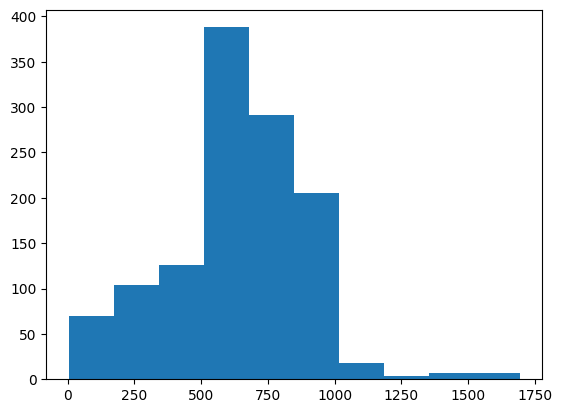

In [15]:
plt.hist(df.lifeday)

Let's check die coin only:

(array([ 59.,  67.,  84., 140.,  35.,  10.,   0.,   1.,   1.,   7.]),
 array([   6. ,  174.6,  343.2,  511.8,  680.4,  849. , 1017.6, 1186.2,
        1354.8, 1523.4, 1692. ]),
 <BarContainer object of 10 artists>)

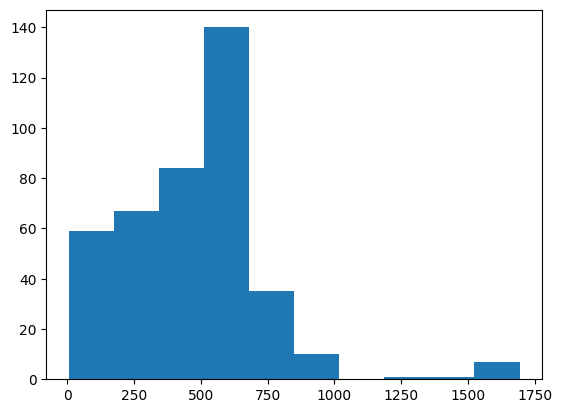

In [16]:
df_inactive = df[df['is_active']==0]
plt.hist(df_inactive.lifeday)